In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:

data = pd.read_csv("Performance.csv")
data.head()

,Loss Train,Loss Test,F1 Train,F1 Test
0,0.614842,0.691100,0.647158,0.284091
1,0.409973,0.708082,0.848007,0.284091
2,0.366416,0.759906,0.848039,0.284091
3,0.322801,0.821529,0.894115,0.284091
4,0.323319,0.850821,0.880601,0.284091


In [10]:
loss_train = data['Loss Train']
loss_test = data['Loss Test']
f1_train = data['F1 Train']
f1_test = data['F1 Test']

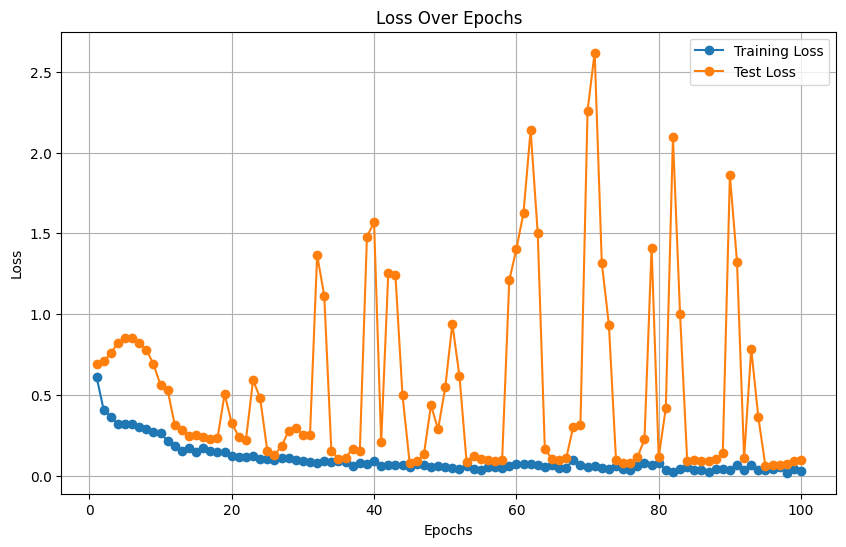

In [13]:

df = pd.read_csv("Performance.csv")
# Number of epochs
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train, label='Training Loss', marker='o')
plt.plot(epochs, loss_test, label='Test Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


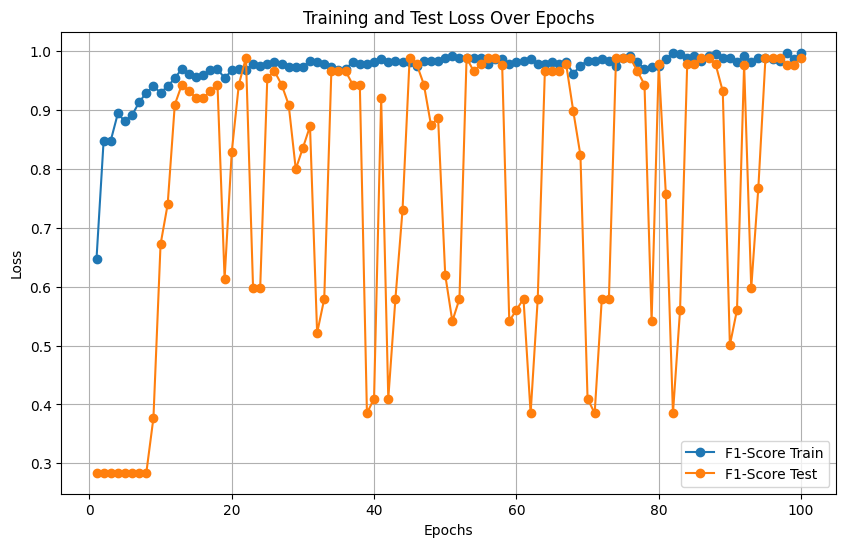

In [12]:
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, f1_train, label='F1-Score Train', marker='o')
plt.plot(epochs, f1_test, label='F1-Score Test', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# CONFUSION MATRIX

In [30]:
from BaseModel import BinaryClassifier
from ConfigModel import *
import torch
import torchvision
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
model = BinaryClassifier().to(DEVICE)


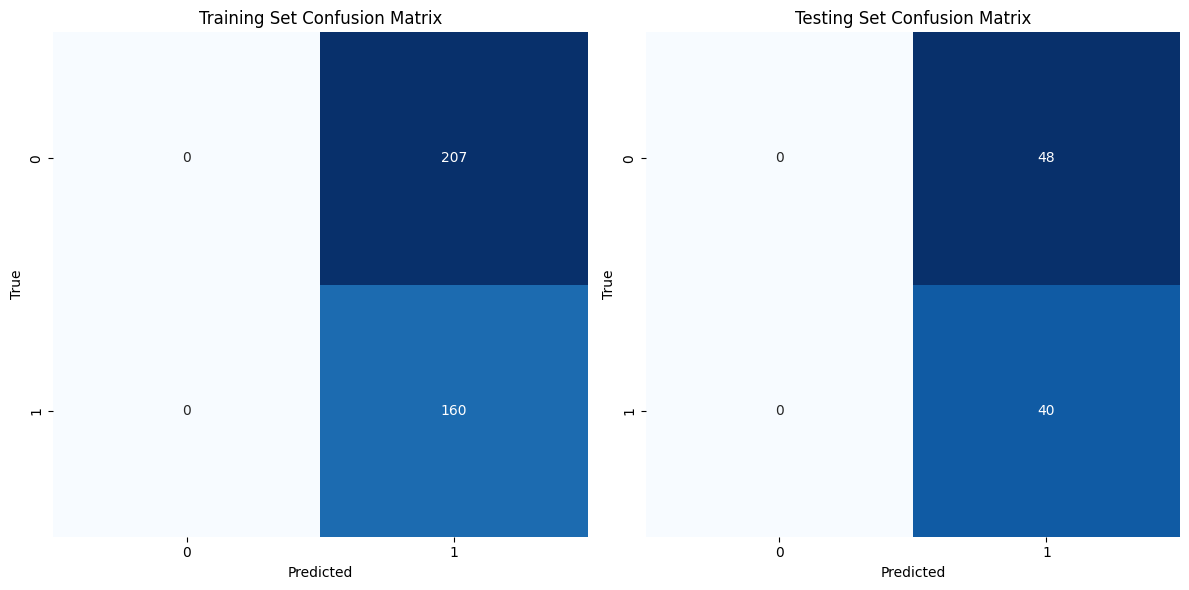

In [33]:
# Define the device (CPU or GPU) for the model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode
model.eval()

# Training Set
true_labels_train = []
predicted_labels_train = []

for inputs, labels in TRAINLOADER:
    inputs = inputs.to(DEVICE)
    labels = labels.to(DEVICE).long()

    outputs = model(inputs)
    
    _, predicted = torch.max(outputs.data, 1)
    
    true_labels_train.extend(labels.cpu().numpy())
    predicted_labels_train.extend(predicted.cpu().numpy())

# Testing Set
true_labels_test = []
predicted_labels_test = []

model.eval()  # Set the model to evaluation mode
total_loss_test = 0.0
total_samples = 0

with torch.no_grad():
    for inputs, labels in TESTLOADER:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE).long()
        outputs = model(inputs)
        loss_test = criterion(outputs, labels)
        total_loss_test += loss_test.item() * len(labels)
        total_samples += len(labels)

        _, predicted = torch.max(outputs.data, 1)
        predicted_labels_test.extend(predicted.cpu().numpy())
        true_labels_test.extend(labels.cpu().numpy())

# Compute the confusion matrices
confusion_train = confusion_matrix(true_labels_train, predicted_labels_train)
confusion_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Create heatmaps to visualize the confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_train, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Training Set Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_test, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Testing Set Confusion Matrix")

plt.tight_layout()
plt.show()

In [5]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load the saved NumPy arrays
data = np.load("dataset.npz")
images = data['images']
labels = data['labels']

# Convert NumPy arrays to PyTorch tensors
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

# Create a PyTorch dataset
dataset = TensorDataset(images, labels)

# Create a PyTorch DataLoader for batch processing
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [6]:
for a,b in dataloader:
    print(a.shape)

torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])
torch.Size([16, 3, 224, 224])
torch.Size([15, 3, 224, 224])


In [3]:
import pandas as pd
df = pd.read_csv('my_dataframe.csv')
df

,Loss Train,Loss Test,F1 Train,F1 Test
0,7.030030e-01,0.756172,0.480662,0.360119
1,1.228669e-02,0.224145,1.000000,1.000000
2,5.472956e-06,0.084272,1.000000,1.000000
3,5.824642e-07,0.037340,1.000000,1.000000
4,2.927397e-07,0.018603,1.000000,1.000000
5,7.544890e-09,0.010279,1.000000,1.000000
6,3.017957e-09,0.006155,1.000000,1.000000
7,8.450267e-08,0.003755,1.000000,1.000000
8,1.508978e-09,0.002175,1.000000,1.000000
9,1.508978e-08,0.001112,1.000000,1.000000
